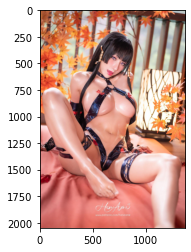

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

class Processing:

    def drawBoth(self, original_src, result_src):
        rgb_ori = cv2.cvtColor(original_src, cv2.COLOR_BGR2RGB)
        rgb_rs = cv2.cvtColor(result_src, cv2.COLOR_BGR2RGB)
        plt.subplot(1,2,1)
        plt.imshow(rgb_ori)
        plt.subplot(1,2,2)
        plt.imshow(rgb_rs)
        plt.show()

    def draw(self, src):
        src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
        plt.imshow(src)
        plt.show()

    def filterNoise(self, src):
        # Khử noise - bỏ nhiễu
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
        src = cv2.erode(src,kernel,iterations=2)
        src = cv2.dilate(src,kernel,iterations=2)
        return src

    def detectSkin(self, src):
        frame = self.filterNoise(src)
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        lowerColor, upperColor = (np.array([0,48,20]), np.array([20,255,255]))
        mask = cv2.inRange(hsv, lowerColor, upperColor)
        return cv2.bitwise_and(src, src, mask = mask)

    def detectBlue(self, src):
        # Khử nhiễu cho ảnh
        frame = self.filterNoise(src)
        # chuyển rgb thành hsv 
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        # ranh giới của màu xanh
        lowerColor, upperColor = (np.array([95,50,20]), np.array([132,255,255]))
        # tìm vào đặt vào mặt nạ chỉ có màu trắng đen (1: trắng và 0: đen), màu nào là xanh thì tô trắng
        mask = cv2.inRange(hsv, lowerColor, upperColor)
        # xử dụng phép tính bit and để ghép bức ảnh thật và mask lại để hiện ra vật nào là màu xanh
        return cv2.bitwise_and(src, src, mask = mask)

    def kernel(self, src, kernel):
        if kernel is None:
            kernel = np.array([[1,1,1],[1,1,1],[1,1,1]])
        result = cv2.filter2D(src, -1, kernel)
        return result

    def sketch(self, src):
        gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
        edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 5)
        return edges

    def cartoonize(self, src):
        # Khử nhiễu
        frame = self.filterNoise(src)
        # Biến ảnh thành trắng đen
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # Làm mờ ảnh trắng đen
        # blur = cv2.blur(gray,(5,5))
        blur = cv2.bilateralFilter(gray,9,75,75)
        # tìm rìa của các đối tượng
        edges = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 5)
        # Làm mờ ảnh gốc
        color = cv2.blur(frame, (5,5))
        # Gán ảnh mờ gốc + mờ rìa = cartoon
        return cv2.bitwise_and(color, color, mask = edges)
    
    def morphologyEx(self, src , kernel_tuple, mode = None):
        if mode is not None:
            # ma trận k bậc phải là số lẻ
            k = np.ones(kernel_tuple) 
            result = cv2.morphologyEx(src, mode, k)
            return result
        return src
    
    def saveImage(self , src, imgName = 'output.jpg'):
        # Tên mặc định của hình là output.jpg
        cv2.imwrite(f"../save_images/{imgName}", src)

name = 'cosplay_1.jpg'
source = '../source/' + name
dest = '../save_images/' + name
original_img = cv2.imread(source)
processing = Processing()
# blue_detect = processing.detectBlue(original_img)
# processing.drawBoth(original_img, blue_detect)
processing.draw(original_img)

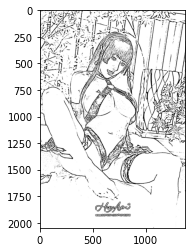

In [2]:
sketch_1 = processing.sketch(cv2.blur(original_img, (3, 3)))
processing.draw(sketch_1)
# processing.saveImage(sketch_1, name)

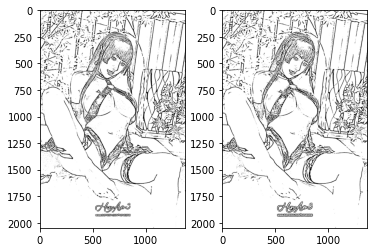

In [4]:
morphology = processing.morphologyEx(original_img, (3,3), mode = cv2.MORPH_CROSS)
sketch_2 = processing.sketch(cv2.blur(morphology,(3,3)))
# processing.draw(morphology)
processing.drawBoth(sketch_1, sketch_2)
processing.saveImage(sketch_2, name)